# Student Intervention System – Assignment 2 (EIACD)

**Author:** Ricardo Daniel Teixeira Gonçalves – 201206788  
**Course:** Elements of Artificial Intelligence and Data Science (EIACD)  
**Assignment:** No. 2 – Machine Learning Project  

---

#### **Introduction and Project Objective**

This project was developed as part of Assignment 2 for the course *Artificial Intelligence and Data Science* (EIACD), in the Artificial Intelligence and Data Science Bachelor's Degree at the University of Porto.

The main goal of this assignment is to build a complete Machine Learning (ML) pipeline capable of predicting whether a student will pass or fail their final exam. This predictive system serves as an early intervention tool to identify students at risk of academic failure, enabling proactive support from educators and institutions.

An adapted real-world dataset collected by Cortez and Silva (2008) was utilized, which combines academic, demographic, and social features from Portuguese secondary school students. The dataset includes variables such as study time, previous failures, parental background, alcohol consumption, and relationship status, among others.

This notebook explores the data, cleans and preprocesses it, engineers new features, and applies supervised learning models to perform binary classification (pass/fail). The models are evaluated using multiple metrics, including confusion matrix, ROC curve, precision, recall, and accuracy. Additionally, feature importance is analyzed to interpret the factors that most influence student success.

The final outcome is a data-driven system that supports the identification of at-risk students, contributing to a more effective and fair educational approach.


## 1. Import Libraries and Data Loading 

In [3]:
# Built-in libraries
import random
import time

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning - Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Machine Learning - Sampling and validation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Machine Learning - Metrics and evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Resampling for imbalanced classes
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Configure pandas display options
pd.set_option(
    "display.max_columns", None
)

# Load the dataset
df = pd.read_csv("student-data.csv")

## 2. Exploratory Data Analysis (EDA)

#### **2.1. Data Dictionary**

| #  | Attribute     | Type      | Description                                                                                 |
|----|---------------|-----------|---------------------------------------------------------------------------------------------|
| 1  | school        | binary    | student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)                   |
| 2  | sex           | binary    | student's sex ("F" - female or "M" - male)                                                 |
| 3  | age           | numeric   | student's age (from 15 to 22)                                                              |
| 4  | address       | binary    | student's home address type ("U" - urban or "R" - rural)                                   |
| 5  | famsize       | binary    | family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)                         |
| 6  | Pstatus       | binary    | parent's cohabitation status ("T" - living together or "A" - apart)                        |
| 7  | Medu          | numeric   | mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
| 8  | Fedu          | numeric   | father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
| 9  | Mjob          | nominal   | mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") |
| 10 | Fjob          | nominal   | father's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") |
| 11 | reason        | nominal   | reason to choose this school (close to "home", school "reputation", "course" preference or "other") |
| 12 | guardian      | nominal   | student's guardian ("mother", "father" or "other")                                         |
| 13 | traveltime    | numeric   | home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) |
| 14 | studytime     | numeric   | weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)     |
| 15 | failures      | numeric   | number of past class failures (n if 1<=n<3, else 4)                                         |
| 16 | schoolsup     | binary    | extra educational support (yes or no)                                                      |
| 17 | famsup        | binary    | family educational support (yes or no)                                                     |
| 18 | paid          | binary    | extra paid classes within the course subject (yes or no)                                   |
| 19 | activities    | binary    | extra-curricular activities (yes or no)                                                    |
| 20 | nursery       | binary    | attended nursery school (yes or no)                                                        |
| 21 | higher        | binary    | wants to take higher education (yes or no)                                                 |
| 22 | internet      | binary    | Internet access at home (yes or no)                                                        |
| 23 | romantic      | binary    | with a romantic relationship (yes or no)                                                  |
| 24 | famrel        | numeric   | quality of family relationships (from 1 - very bad to 5 - excellent)                       |
| 25 | freetime      | numeric   | free time after school (from 1 - very low to 5 - very high)                                |
| 26 | goout         | numeric   | going out with friends (from 1 - very low to 5 - very high)                                |
| 27 | Dalc          | numeric   | workday alcohol consumption (from 1 - very low to 5 - very high)                           |
| 28 | Walc          | numeric   | weekend alcohol consumption (from 1 - very low to 5 - very high)                           |
| 29 | health        | numeric   | current health status (from 1 - very bad to 5 - very good)                                 |
| 30 | absences      | numeric   | number of school absences (from 0 to 93)                                                   |


#### **2.2. Data Preview and Statistics**

In [4]:
# Display the first few rows of the dataset
print("Dataset Preview:")
display(df)

# Display dataset summary
print("\nDataset Summary:")
df.info()

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
display(df.describe())

Dataset Preview:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    obje

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [5]:
# Display the value counts for the variables 'school'
for column in ['school']:
    print(f"Value counts for the variable '{column}':")
    print(df[column].value_counts())
    print("-" * 50)

Value counts for the variable 'school':
school
GP    349
MS     46
Name: count, dtype: int64
--------------------------------------------------


Quick Analysis:
- The `school` feature appears to be imbalanced.
- The `age` and `absences` features have maximum values significantly higher from the average, which may indicate the presence of outliers.
- If confirmed, these outliers will be removed during the data cleaning process.

#### **2.3. School analysis**

The `school` feature was found to be highly imbalanced:
- **GP**: 349 samples  
- **MS**: 46 samples

In [6]:
df["school"].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [7]:
# Test if different schools have different pass rates
# Crosstabulate the data to see the pass/fail rates by school
pd.crosstab(df["school"], df["passed"], normalize="index") * 100

passed,no,yes
school,,
GP,32.378223,67.621777
MS,36.956522,63.043478


Results:
- **GP pass rate**: ~67.6%  
- **MS pass rate**: ~63.0%  
- **Difference**: ~4.2 percentage points

Given the small difference in success rates and the strong imbalance:
- `school` will be **removed** from the analysis in the **Data Cleaning** section, to avoid bias into the model and reduce its generalization capability.

#### **2.4. Feature Correlation**

To identify potential correlations between features, a correlation matrix is utilized.  
- If a high correlation is observed, it is necessary to evaluate whether one of the features can be removed or if they can be combined to simplify subsequent analyses.

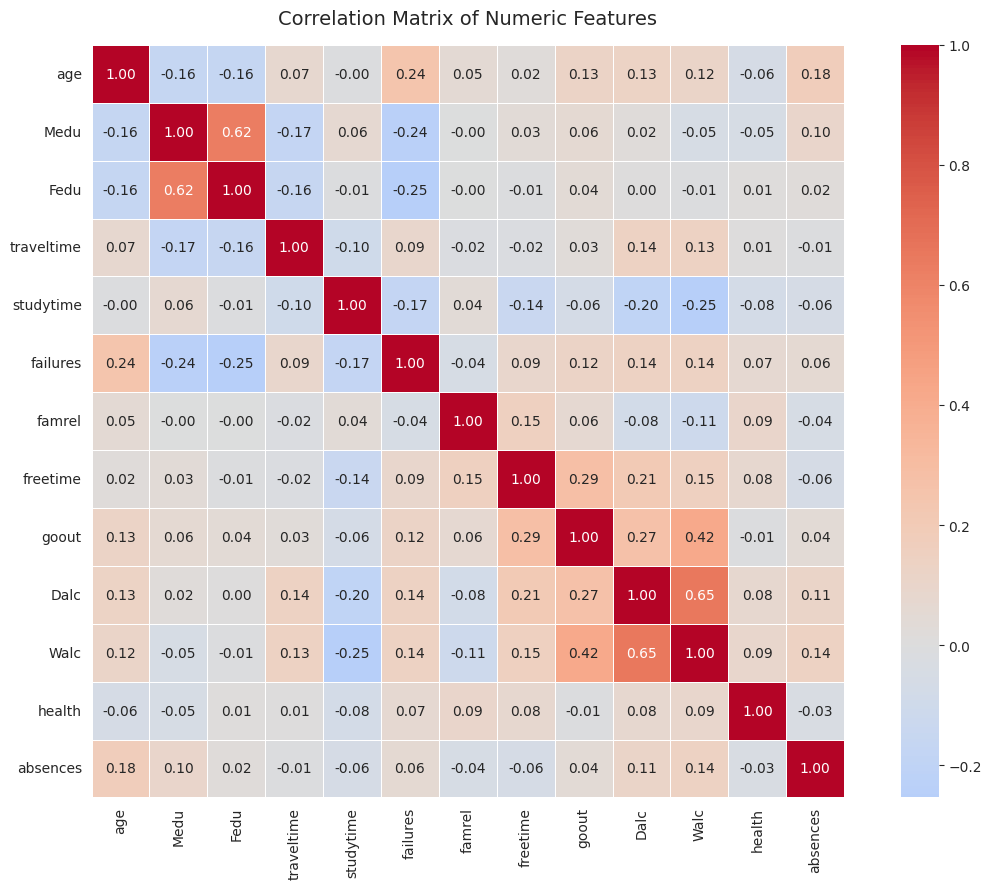

In [8]:
# Create a pairplot to visualize the relationships between numerical features
plt.figure(figsize=(12, 9))
sns.set_style("white")
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", pad=15, fontsize=14)
plt.tight_layout()
plt.show()

**Heatmap Correlation Observations**

**Positive Correlations**:
- **Walc and Dalc (r = 0.65)**: Strong link between weekend (`Walc`) and weekday (`Dalc`) alcohol consumption, indicating consistent drinking habits.
- **Medu and Fedu (r = 0.62)**: High correlation between parents' education levels, reflecting similar educational backgrounds.
- **Goout with Walc (r = 0.42) and Dalc (r = 0.27)**: Increased social outings (`Goout`) are associated with higher alcohol consumption, especially on weekends.
- **Freetime and Goout (r = 0.29)**: More free time correlates with increased social activity.

**Negative Correlations**:
- **Failures with Medu (r = -0.24) and Fedu (r = -0.25)**: Higher parental education is linked to fewer academic failures.
- **Studytime with Dalc (r = -0.20) and Walc (r= -0.25)**: More study time correlates with lower alcohol consumption.

**Conclusion**:
- Consider combining `Medu` and `Fedu` into a single feature.
- Despite their correlation, `Dalc` and `Walc` were kept separate to verify it's importance seperatly.


#### **2.5. Analysis of "Age", "Absences", "Studytime", and Their Relationship with Academic Success**

This section examines the relationship between `age`, `absences`, and `studytime` with academic performance. These features are analyzed due to their established relevance in predicting student outcomes.

##### Absences

Analysis of outliers in the 'absences' variable:

Number of outliers: 15
Percentage of outliers: 3.80%

Statistics of outliers:
count    15.000000
mean     33.733333
std      16.113289
min      21.000000
25%      22.500000
50%      26.000000
75%      39.000000
max      75.000000
Name: absences, dtype: float64


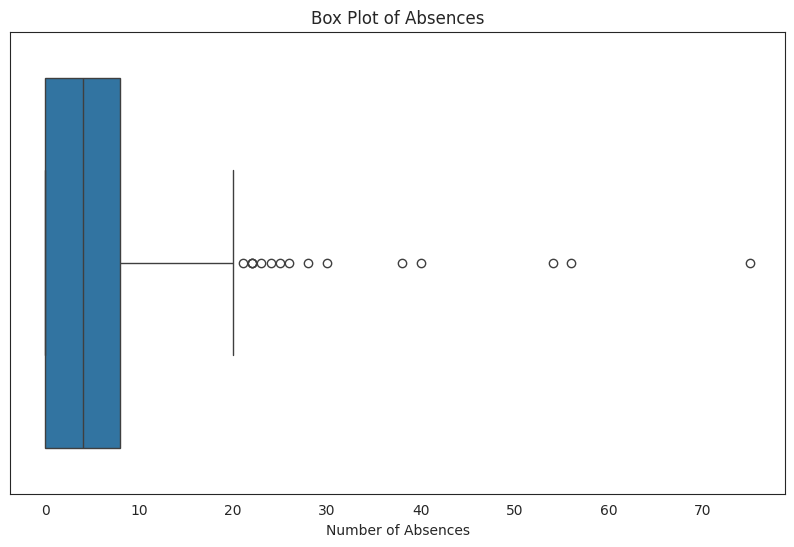

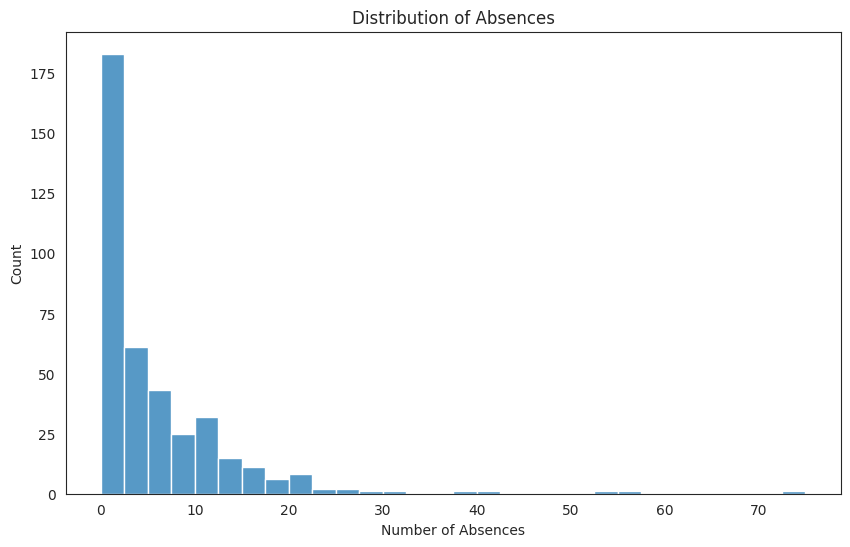


Extreme values (top 10 highest absences):
     absences passed
276        75     no
183        56     no
74         54    yes
315        40    yes
307        38     no
280        30     no
205        28     no
103        26     no
40         25    yes
198        24    yes


In [9]:
# Analyze outliers in the 'absences' variable
print("Analysis of outliers in the 'absences' variable:")

# Calculate quartiles and IQR
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['absences'] < lower_bound) | (df['absences'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")

# Display statistics of outliers
print("\nStatistics of outliers:")
print(outliers['absences'].describe())

# Create a box plot to visualize the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['absences'])
plt.title('Box Plot of Absences')
plt.xlabel('Number of Absences')
plt.show()

# Create a histogram to show the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='absences', bins=30)
plt.title('Distribution of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Count')
plt.show()

# Display the extreme values
print("\nExtreme values (top 10 highest absences):")
print(df.nlargest(10, 'absences')[['absences', 'passed']])

##### Age

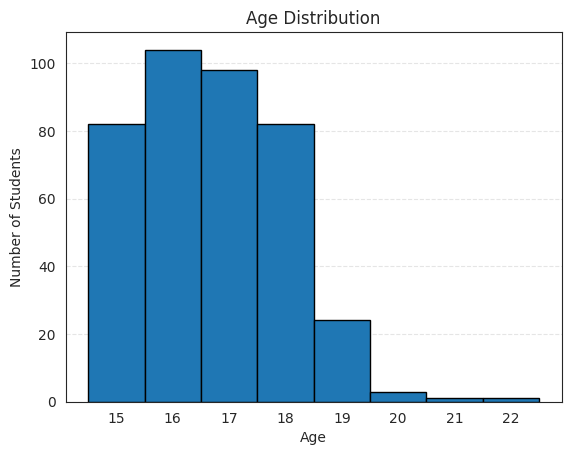

In [10]:
# Create the age distribution plot
bins = np.arange(df["age"].min() - 0.5, df["age"].max() + 1.5, 1)
plt.hist(df["age"], bins=bins, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(range(df["age"].min(), df["age"].max() + 1))  # Ensure ticks align with ages
plt.show()


Outliers:
     age passed  failures
247   22     no         3


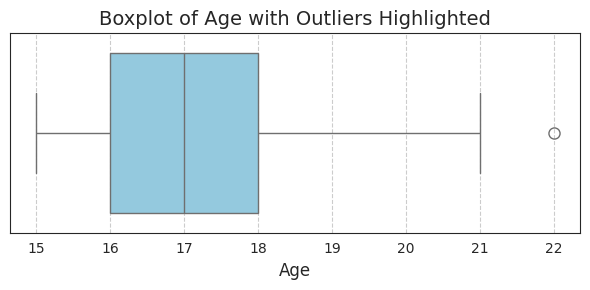

In [11]:
# Calculate Q1, Q3, and IQR for the 'age' column
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("\nOutliers:")
print(outliers[["age", "passed", "failures"]])

# Plot: Boxplot of age with visible outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["age"], color="skyblue", fliersize=8)
plt.title("Boxplot of Age with Outliers Highlighted", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.grid(True, axis="x", linestyle="--", alpha=1)
plt.tight_layout()
plt.show()

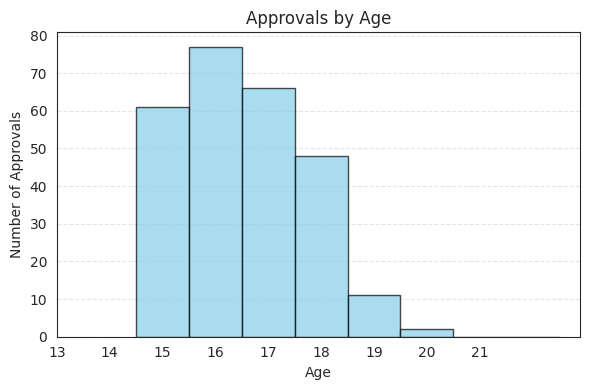

In [12]:
# Filter the data for approvals (passed == 'yes')
approved_students = df[df["passed"] == "yes"]

# Create the histogram
plt.figure(figsize=(6, 4))
plt.hist(
    approved_students["age"], bins=bins, edgecolor="black", color="skyblue", alpha=0.7
)
plt.title("Approvals by Age", fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Number of Approvals", fontsize=10)
plt.xticks(range(int(lower_bound), int(upper_bound) + 1))
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Analysis of the Age Variable**

- The majority of students are aged **15 to 18**.
- A single **outlier** was identified:
  - **Age 22**, likely reflecting a non-traditional academic path with 3 failures.
  - **This outlier will be removed to ensure data consistency.**

- **Approvals by Age**:
  - Highest approval rates are observed among students aged **15 to 17**.
  - Approval rates decline from age **18** onwards, with significantly lower rates for students aged **19 and above**.

- **Conclusion**:
  - `Age` appears to be a significant predictor of academic success.


##### Relationship between Absences, Study Time, and Academic Success

In [13]:
# Categorize absences: Low (≤ median) and High (> median)
median_abs = df["absences"].median()
df["abs_cat"] = pd.cut(
    df["absences"],
    bins=[-1, median_abs, df["absences"].max()],
    labels=["Low Absence", "High Absence"],
)

# Map study time (1–4 scale) to descriptive categories
df["study_cat"] = df["studytime"].map({1: "≤2 h", 2: "2-5 h", 3: "5-10 h", 4: ">10 h"})


**Here, the conversion of the `passed` variable to binary is performed (this is typically done during the data preprocessing stage)**

In [14]:
# Binary target
df["passed"] = df["passed"].map({"yes": 1, "no": 0})

In [15]:
# Crosstab of success rate by absence and study time categories
cross_table = pd.crosstab(
    df["abs_cat"], df["study_cat"], df["passed"], aggfunc="mean",
).round(2)

# Reorder study time categories
study_time_order = ["≤2 h", "2-5 h", "5-10 h", ">10 h"]
cross_table = cross_table[study_time_order]

display(cross_table * 100)

study_cat,≤2 h,2-5 h,5-10 h,>10 h
abs_cat,,,,
Low Absence,65.0,70.0,73.0,67.0
High Absence,64.0,56.0,81.0,83.0


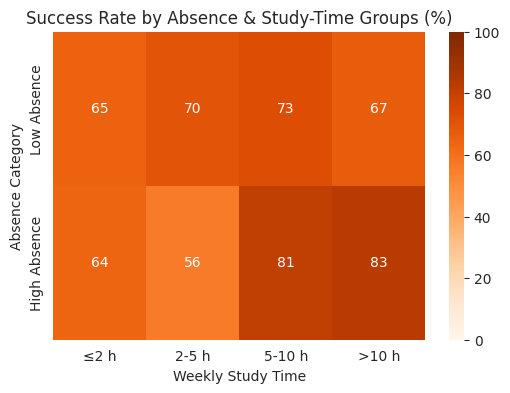

In [16]:
# Heatmap of success rate by absence & study group
plt.figure(figsize=(6, 4))
sns.heatmap(cross_table * 100, annot=True, cmap="Oranges", fmt=".0f", vmin=0, vmax=100)
plt.title("Success Rate by Absence & Study-Time Groups (%)")
plt.ylabel("Absence Category")
plt.xlabel("Weekly Study Time")
plt.show()

**Interpretation: Success Rate by Absence and Study Time**

This table shows the percentage of students who passed, segmented by:

- **Absence category** (`abs_cat`):  
  - `Low Absence` = below the median number of absences  
  - `High Absence` = above the median number of absences

- **Study time category** (`study_cat`):  
  - `≤2 h`, `2–5 h`, `5–10 h`, `>10 h` (hours of weekly study)

---

**Key Observations**:

- **High Absence + >10 h → 83% success**
  - Despite many absences, students who study more than 10 hours/week show the **highest success rate**.
  - Self-study appears to compensate effectively for lack of attendance.

- **Low Absence + 5–10 h → 73%**
  - Students with low absences and moderate study time also perform very well.
  - This is a strong and balanced group.

- **Low Absence + ≤2 h → 65%**
  - Good attendance alone is not enough. Minimal study time leads to lower success.

- **High Absence + 2–5 h → 56%**
  - This group has both high absences and low study time.
  - It shows the **lowest success rate**, clearly identifying a group at risk.

---

**Conclusions**:

- **Study time is a stronger predictor than attendance**:
  - For example, `High Absence + >10 h` (83%) outperforms `Low Absence + ≤2 h` (65%).

- **Best combination**: Low Absence and Study Time ≥ 5 hours → consistently high success.


#### **2.6. Summary of EDA**

The EDA included:
- Data dictionary creation.
- Dataset preview and summary statistics.
- Analysis of the `school` variable, with a recommendation for removal.
- Feature correlation to assess relationships and potential collinearity.
- Examination of the target variable (`passed`) to evaluate its characteristics and balance.
- Analysis of `age`, `absences`, and `studytime` to explore their relationship with academic success.


## 3. Data Cleaning e Preprocessing

#### **3.1. Missing values handling**

In [17]:
# Check for duplicates and missing values
print("Duplicates:", df.duplicated().sum())
print("Missing values:", df.isnull().sum().sum())

Duplicates: 0
Missing values: 0


#### **3.2. Outlier removal**

In [18]:
df.shape

(395, 33)

In [ ]:
# Remove outliers from the 'age' column
df = df[df["age"] != 22]

# Verify if the outliers were removed
print("Age outliers remaining:", df[df["age"] >= 22].shape[0])
#print("Absences outliers remaining:", df[(df['absences'] < lower_bound) | (df['absences'] > upper_bound)].shape[0])
print(df.shape)

Age outliers remaining: 0
(394, 33)


#### **3.3. Encoding**

##### **3.3.1. Binary Encoding: "yes" to 1 and "no" to 0**

Convert "yes" and "no" values to 1 and 0, respectively.  
This process is used when the values are already in the "yes" and "no" format.

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed,abs_cat,study_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0,High Absence,2-5 h
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0,Low Absence,2-5 h
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,1,High Absence,2-5 h
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,1,Low Absence,5-10 h
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,1,Low Absence,2-5 h


In [21]:
# List of columns with "yes" / "no" values
binary_cols = [
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic",
]

def binary_encode_columns(df, columns):
    return df[columns].apply(lambda col: col.map({"yes": 1, "no": 0}))

# Apply the function to binary columns
df[binary_cols] = binary_encode_columns(df, binary_cols)

In [22]:
df[binary_cols].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


##### **3.3.2. One-Hot Encoding**

In [23]:
# List of nominal categorical columns (with multiple categories)
multi_cat_cols = [
    "Mjob",
    "Fjob",
    "reason",
    "guardian",
    "sex",
    "address",
    "famsize",
    "Pstatus",
]

# Apply OneHotEncoding and add to the original dataset
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Check dimensions and first columns
print("Final Dimension:", df.shape)
df.head()

Final Dimension: (394, 42)


,school,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed,abs_cat,study_cat,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,sex_M,address_U,famsize_LE3,Pstatus_T
0,GP,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0,High Absence,2-5 h,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
1,GP,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0,Low Absence,2-5 h,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
2,GP,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,High Absence,2-5 h,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,True
3,GP,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1,Low Absence,5-10 h,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True
4,GP,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,1,Low Absence,2-5 h,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True


##### **3.4. Feature Engeneering**

- Creation of the feature `avgEdu`, which is the average of `Medu` and `Fedu`.
- Creation of the feature `student_support`, which is the sum of `famsup` and `schoolsup`.

In [24]:
def create_avg_education(df):
    df["avgEdu"] = (df["Medu"] + df["Fedu"]) / 2
    return df

def create_student_support(df):
    df["student_support"] = df["famsup"] + df["schoolsup"]
    return df

# Apply the feature engineering functions
df = create_avg_education(df)
df = create_student_support(df)

# Confirm updates
print("Final columns after modifications:")
print(df.columns.tolist())

Final columns after modifications:
['school', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed', 'abs_cat', 'study_cat', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'avgEdu', 'student_support']


#### **3.6. Features reduction**

The following features will be removed as they are not necessary:
- `school`: Established above as not relevant
- `abs_cat` and `study_cat`: Used in section 2.7 and are no longer relevant

In [25]:
# School was not a significant factor in the analysis, so we can drop it
df.drop(columns=["school", "abs_cat", "study_cat"], inplace=True)
# Drop Medu and Fedu after creating avgEdu
df.drop(columns=["Medu", "Fedu"], inplace=True)
# Drop famsup and schoolsup after creating student_support
df.drop(columns=["famsup", "schoolsup"], inplace=True)

##### **3.6.1 PCA**

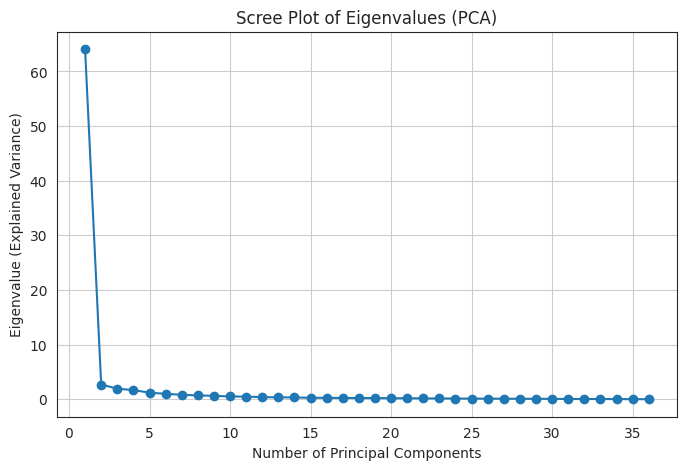

In [26]:
# Select only numerical or already encoded features
X = df.drop("passed", axis=1)
feature_names = X.columns

# Apply PCA retaining all components
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)

eigenvalues = pca.explained_variance_
explained_var_ratio = (
    pca.explained_variance_ratio_
)  # Variance explained by each component
explained_var_cum = explained_var_ratio.cumsum()  # Cumulative explained variance

# Scree plot of eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Eigenvalue (Explained Variance)")
plt.title("Scree Plot of Eigenvalues (PCA)")
plt.grid()
plt.show()

In [27]:
# 4. Loadings matrix: weights of original variables in each component
loadings = pd.DataFrame(
    pca.components_.T,              # Transpose so each row is a variable
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=feature_names
)

# Show the 6 variables that contribute most to each principal component
for pc in loadings.columns[:3]:  # Only show the first 3 components
    print(f"\n{pc} - most relevant variables:")
    print(loadings[pc].abs().sort_values(ascending=False).head(6))



PC1 - most relevant variables:
absences    0.999075
age         0.026541
Walc        0.021650
Dalc        0.011470
romantic    0.008866
avgEdu      0.008821
Name: PC1, dtype: float64

PC2 - most relevant variables:
Walc        0.669229
goout       0.410545
Dalc        0.370918
health      0.291465
freetime    0.237297
age         0.178227
Name: PC2, dtype: float64

PC3 - most relevant variables:
health    0.878292
age       0.375392
goout     0.183792
Walc      0.130103
avgEdu    0.093240
famrel    0.087024
Name: PC3, dtype: float64


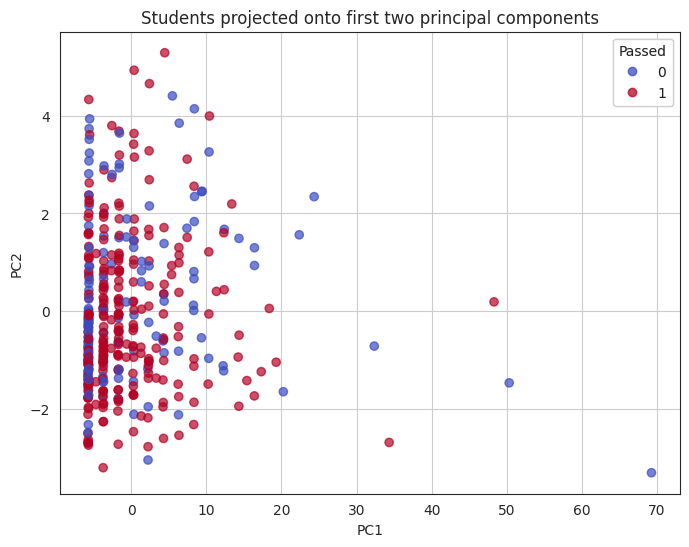

In [28]:
# Get target variable for coloring the points
y = df["passed"]

# Create scatter plot of first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Students projected onto first two principal components")
plt.grid(True)

# Add legend showing passed/failed classes
legend1 = plt.legend(*scatter.legend_elements(), title="Passed")
plt.gca().add_artist(legend1)

plt.show()


**PCA: Critical Analysis of Results**

Scree Plot – Explained Variance
- The **scree plot** shows a **sharp decline** in variance after **PC1**, indicating:
  - Most variance is captured by the **first principal component**.
  - Components beyond **PC2 or PC3** add little explanatory power.
  - The dataset is **highly redundant**, with a few features driving most variability.

---

Interpretation of Principal Components

PC1 – Absenteeism
- Dominated by the feature **`absences`** (loading ≈ **0.996**).
- Absences captures the largest share of variance.
- Indicates **strong dependency on a single feature** → risk bias.

Class Separability

- **PC1 vs PC2 projection** shows:
  - **No clear separation** between students who **passed** and those who **failed**.
  - Considerable **overlap between classes**.
  - Implies PCA is **not effective** as a stand-alone tool for classification.


#### **3.7. Class Balance**

Evaluating class balance is essential to understand the distribution of samples across target classes. Imbalanced datasets can lead to biased models, favoring the majority class and reducing predictive performance for the minority class. Addressing this imbalance is crucial for building robust and fair classification models.

##### **3.7.1. Check Target Balance**

Absolute class counts:
passed
1    265
0    129
Name: count, dtype: int64

Class percentages:
passed
1    67.26
0    32.74
Name: proportion, dtype: float64


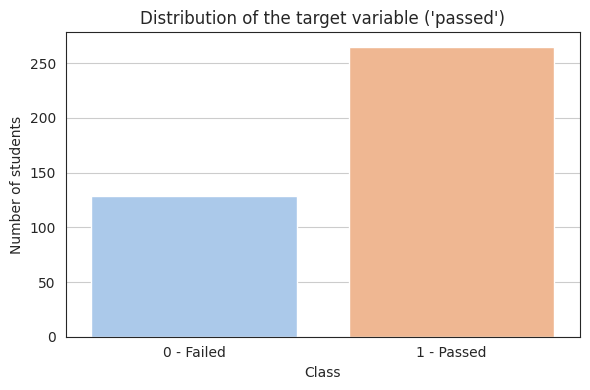

In [29]:
# View the distribution of the target variable
target_counts = df["passed"].value_counts()
target_percent = df["passed"].value_counts(normalize=True) * 100

# Display absolute and percentage counts
print("Absolute class counts:")
print(target_counts)
print("\nClass percentages:")
print(target_percent.round(2))

# Bar plot with counts
plt.figure(figsize=(6, 4))
sns.countplot(x="passed", data=df, hue="passed", palette="pastel", legend=False)
plt.title("Distribution of the target variable ('passed')")
plt.xlabel("Class")
plt.ylabel("Number of students")
plt.xticks([0, 1], ["0 - Failed", "1 - Passed"])
plt.grid(axis="y")
plt.tight_layout()
plt.show()

The target variable `passed` is imbalanced, with a higher proportion of students passing the course. The SMOTE technique will be applied after cross-validation to address this imbalance and ensure a more balanced dataset for model training.

## 4. Modeling and Tuning

#### **4.1. Spliting train and test sets**

In [30]:
def split_data(X, y, test_size=0.3, random_state=42, stratify=True, verbose=True):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y if stratify else None
    )
    
    return X_train, X_test, y_train, y_test

# Prepare features (X) and target (y)
X = df.drop("passed", axis=1)  # All columns except 'passed'
y = df["passed"]  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = split_data(X, y)

# Print split results
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())

Training set size: 275
Test set size: 119
Class distribution in training set:
passed
1    185
0     90
Name: count, dtype: int64
Class distribution in test set:
passed
1    80
0    39
Name: count, dtype: int64


In [31]:
# Dictionary of pipelines
pipelines = {
    "Decision Tree": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Logistic Regression": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(random_state=42))
    ]),
    "KNN": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    "SVC": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("clf", SVC(random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", RandomForestClassifier(random_state=42))
    ]),
    "MLPClassifier": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(random_state=42))
    ]),
}

#### **4.2. Model Application and Initial Evaluation**

In [ ]:
# Dictionary containing different machine learning classifiers to test
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state=42, probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(random_state=42, max_iter=2000)
}

# Initialize empty list to store evaluation metrics for each model
results = []

# Iterate through each classifier to train and evaluate performance
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate ROC/AUC score if model supports probability predictions
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class
        auc = roc_auc_score(y_test, y_proba)  # Calculate Area Under ROC Curve
    else:
        # For SVC without probability estimates, use decision function
        if name == "SVC":
            y_score = model.decision_function(X_test)
            auc = roc_auc_score(y_test, y_score)
        else:
            auc = None  # Set AUC to None if model doesn't support probability predictions

    # Calculate various performance metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="binary")
    rec = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")

    # Store all metrics in a dictionary and append to results list
    results.append(
        {
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1,
            "AUC": auc,
        }
    )

print("All models have been evaluated.")  # Print confirmation message


All models have been evaluated.


In [33]:
# Display final results
df_results = pd.DataFrame(results).set_index("Model")
print("\nSummary of Results:")
display(df_results)



Summary of Results:


,Accuracy,Precision,Recall,F1-score,AUC
Model,,,,,
Decision Tree,0.613445,0.723684,0.6875,0.705128,0.574519
Logistic Regression,0.655462,0.709677,0.8250,0.763006,0.554487
KNN,0.697479,0.734043,0.8625,0.793103,0.650641
SVC,0.663866,0.669492,0.9875,0.797980,0.648077
Random Forest,0.697479,0.724490,0.8875,0.797753,0.593910
MLPClassifier,0.630252,0.704545,0.7750,0.738095,0.573397


**Justification for Evaluation Metrics**

Primary objective is to **identify students at risk of failing** to enable timely interventions. It is essential to minimize the number of failing students that are not detected.

For this purpose, the following metrics are prioritized:

- **Recall (Sensitivity)**: Evaluates the model's ability to correctly identify students at risk. A high recall reduces the likelihood of overlooking failing students.
- **F1-score**: Provides a balance between **precision** and **recall**, offering a more reliable measure in the context of imbalanced classification.

**Accuracy**, due to class imbalance, may not accurately reflect the model's performance.

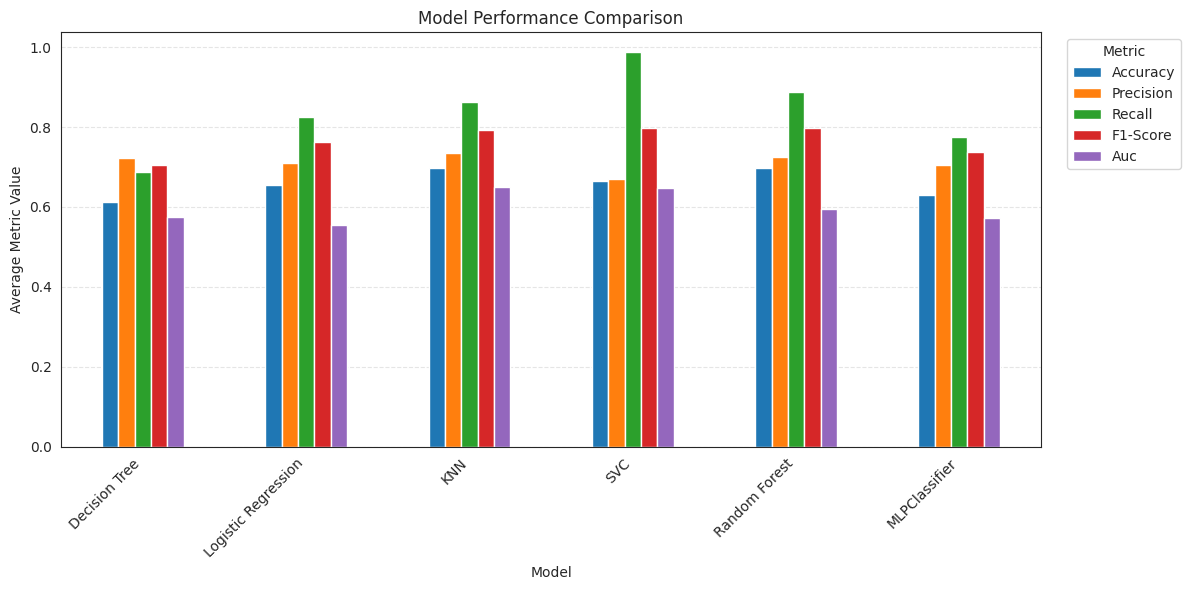

In [34]:
# Plotting the results
df_plot = df_results.rename(columns=lambda x: x.title().replace("_", "-"))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "Auc"]
df_plot = df_plot[metrics_to_plot]
ax = df_plot.plot(kind="bar", figsize=(12, 6))
ax.set_title("Model Performance Comparison")
ax.set_ylabel("Average Metric Value")
ax.set_xticklabels(df_plot.index, rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Metric", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

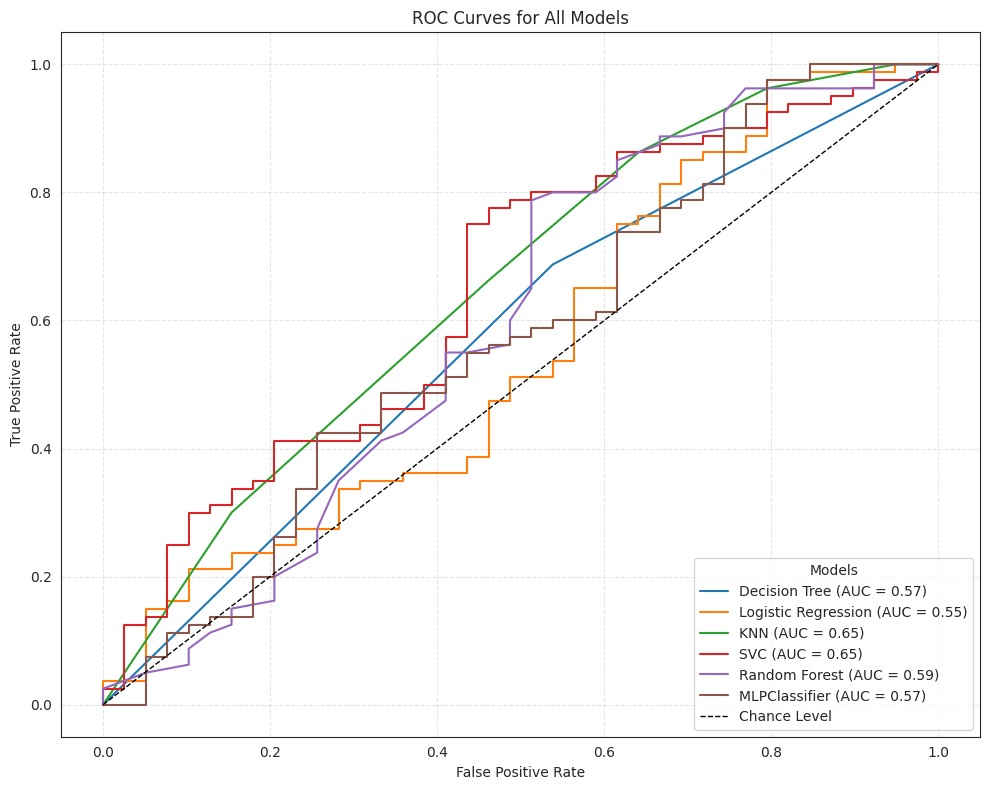

In [35]:
# Create a list of tuples (name, model) from the classifiers dictionary
models = [(name, model) for name, model in classifiers.items()]

plt.figure(figsize=(10, 8))
# For each model, compute and plot the ROC curve
for name, model in models:
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Reference line (random classifier)
plt.plot([0, 1], [0, 1], "k--", lw=1, label="Chance Level")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", title="Models")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### **4.3. Tuning**

**4.3.1. Define Parameters for Each Model**

In [36]:
# 1. Decision Tree
dt_params = {
    "clf__max_depth":         [3, 5, 7, 10, 15, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf":  [1, 2, 4],
    "clf__criterion":         ["gini", "entropy"],
}

# 2. Logistic Regression
lr_params = {
    "clf__C":        [0.01, 0.1, 1, 10],
    "clf__penalty":  ["l2"],
    "clf__solver":   ["lbfgs"],  # 'liblinear', 'saga' removed because convergence issues
    "clf__max_iter": [200, 500, 1000],
}

# 3. K-Nearest Neighbors
knn_params = {
    "clf__n_neighbors": [3, 5, 7, 9],
    "clf__weights":     ["uniform", "distance"],
    "clf__p":           [1, 2],
    "clf__metric":      ["minkowski"],
    "clf__leaf_size":   [20, 30, 40]
}

# 4. Support Vector Classifier (SVC)
svc_params = {
    "clf__C":            [0.1, 1, 10, 100],
    "clf__kernel":       ["rbf", "linear"],
    "clf__gamma":        ["scale", "auto"],
    "clf__class_weight": [None, "balanced"],
    "clf__probability":       [True]
}

# 5. Random Forest
rf_params = {
    "clf__n_estimators":      [100, 200, 500],
    "clf__max_depth":         [3, 5, 10, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf":  [1, 2, 4],
}

# 6. MLP Classifier (Neural Network)
mlp_params = {
    "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "clf__activation":         ["relu", "tanh"],
    "clf__solver":             ["lbfgs"],  # 'adam' removed because convergence issues
    "clf__alpha":              [0.0001, 0.001, 0.01],
    "clf__max_iter":           [5000],
}

**4.3.2. Train, Tune, and Evaluate Models**

In [37]:
def calculate_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }
    
    if y_proba is not None:
        try:
            metrics['auc'] = roc_auc_score(y_true, y_proba)
        except Exception:
            metrics['auc'] = np.nan
    return metrics

def get_proba_scores(estimator, X):
    if hasattr(estimator, 'predict_proba'):
        return estimator.predict_proba(X)[:, 1]
    elif hasattr(estimator, 'decision_function'):
        scores = estimator.decision_function(X)
        return (scores - scores.min()) / (scores.max() - scores.min() + 1e-8)
    return None

models_info = [
    ("Decision Tree", pipelines["Decision Tree"], dt_params),
    ("Logistic Regression", pipelines["Logistic Regression"], lr_params),
    ("KNN", pipelines["KNN"], knn_params),
    ("SVC", pipelines["SVC"], svc_params),
    ("Random Forest", pipelines["Random Forest"], rf_params),
    ("MLPClassifier", pipelines["MLPClassifier"], mlp_params),
]

best_params_dict = {}
final_results = []

print("START OF MODEL TRAINING AND EVALUATION")
print("=" * 70)

for name, pipeline, params in models_info:
    print(f"\nModel: {name}\n" + "-" * 32)
    
    # Step 1: Parameter tuning
    print("Step 1: Tuning Hyperparameters...")
    start = time.time()
    grid_search = GridSearchCV(pipeline, params, cv=10, scoring="f1", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params_dict[name] = grid_search.best_params_
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Tuning Time: {time.time() - start:.2f} seconds")
    
    # Step 2: Cross-validation evaluation
    print("Step 2: Evaluating with 20x 10-Fold Cross-Validation...")
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    all_metrics = []
    
    for _ in range(20):
        for train_idx, test_idx in skf.split(X, y):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
            
            best_estimator = grid_search.best_estimator_
            best_estimator.fit(X_tr, y_tr)
            y_pred = best_estimator.predict(X_te)
            y_proba = get_proba_scores(best_estimator, X_te)
            
            metrics = calculate_metrics(y_te, y_pred, y_proba)
            all_metrics.append(metrics)
    
    # Aggregate results
    metrics_df = pd.DataFrame(all_metrics)
    final_results.append({
        "Model": name,
        "Accuracy": metrics_df['accuracy'].mean(),
        "Precision": metrics_df['precision'].mean(),
        "Recall": metrics_df['recall'].mean(),
        "F1-Score": metrics_df['f1'].mean(),
        "AUC": metrics_df['auc'].mean() if 'auc' in metrics_df else np.nan
    })

START OF MODEL TRAINING AND EVALUATION

Model: Decision Tree
--------------------------------
Step 1: Tuning Hyperparameters...
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Tuning Time: 4.17 seconds
Step 2: Evaluating with 20x 10-Fold Cross-Validation...

Model: Logistic Regression
--------------------------------
Step 1: Tuning Hyperparameters...
Best Parameters: {'clf__C': 0.1, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Tuning Time: 0.38 seconds
Step 2: Evaluating with 20x 10-Fold Cross-Validation...

Model: KNN
--------------------------------
Step 1: Tuning Hyperparameters...
Best Parameters: {'clf__leaf_size': 20, 'clf__metric': 'minkowski', 'clf__n_neighbors': 9, 'clf__p': 2, 'clf__weights': 'uniform'}
Tuning Time: 0.92 seconds
Step 2: Evaluating with 20x 10-Fold Cross-Validation...

Model: SVC
--------------------------------
Step 1: Tuning Hyperparameters...
Best Parameters:

4. Tuning Results


Best Hyperparameters for Each Model:
Decision Tree: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Logistic Regression: {'clf__C': 0.1, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
KNN: {'clf__leaf_size': 20, 'clf__metric': 'minkowski', 'clf__n_neighbors': 9, 'clf__p': 2, 'clf__weights': 'uniform'}
SVC: {'clf__C': 0.1, 'clf__class_weight': None, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__probability': True}
Random Forest: {'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 500}
MLPClassifier: {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 5000, 'clf__solver': 'lbfgs'}

Evaluation Complete. Summary of Results:


,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Decision Tree,0.586218,0.692386,0.686752,0.687037,0.509078
Logistic Regression,0.640000,0.736167,0.720940,0.727419,0.627529
KNN,0.581090,0.690824,0.682906,0.685306,0.551824
SVC,0.639744,0.695155,0.830199,0.755749,0.569910
Random Forest,0.654936,0.725406,0.785043,0.753498,0.602148
MLPClassifier,0.569038,0.684417,0.664103,0.672255,0.556279


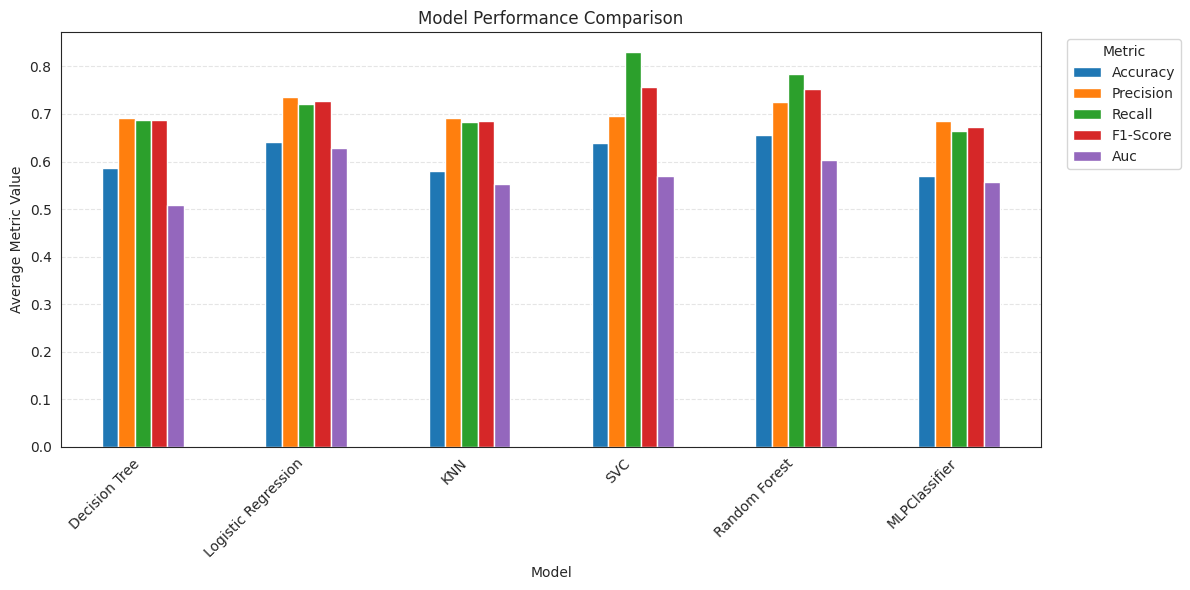

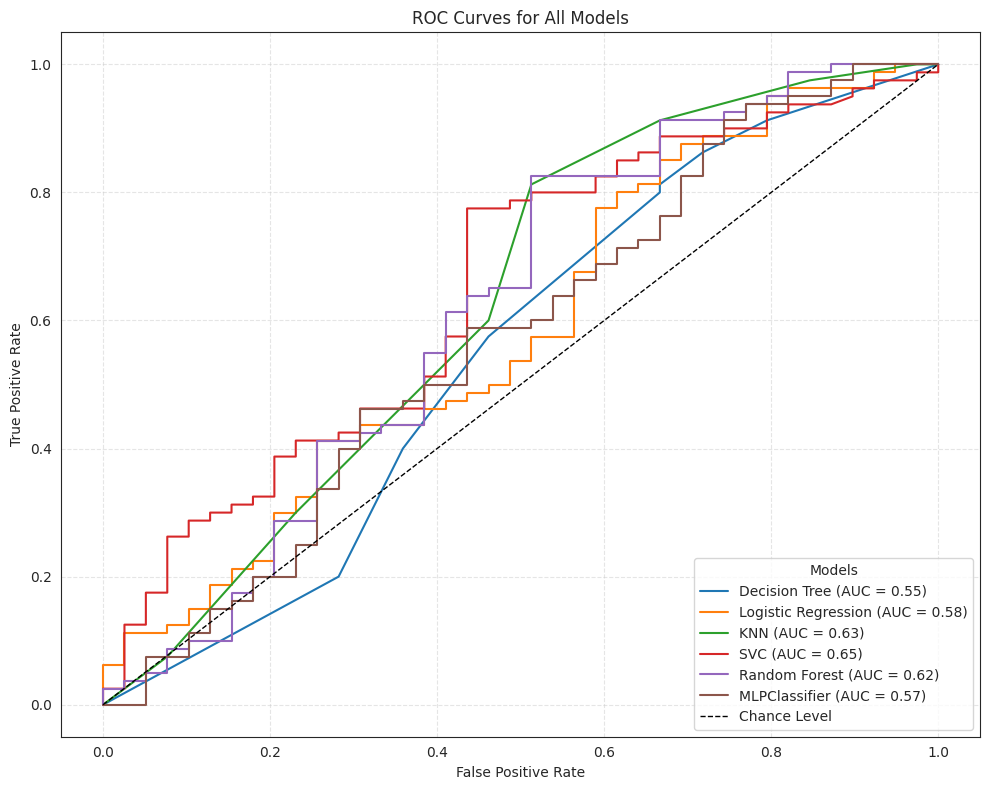

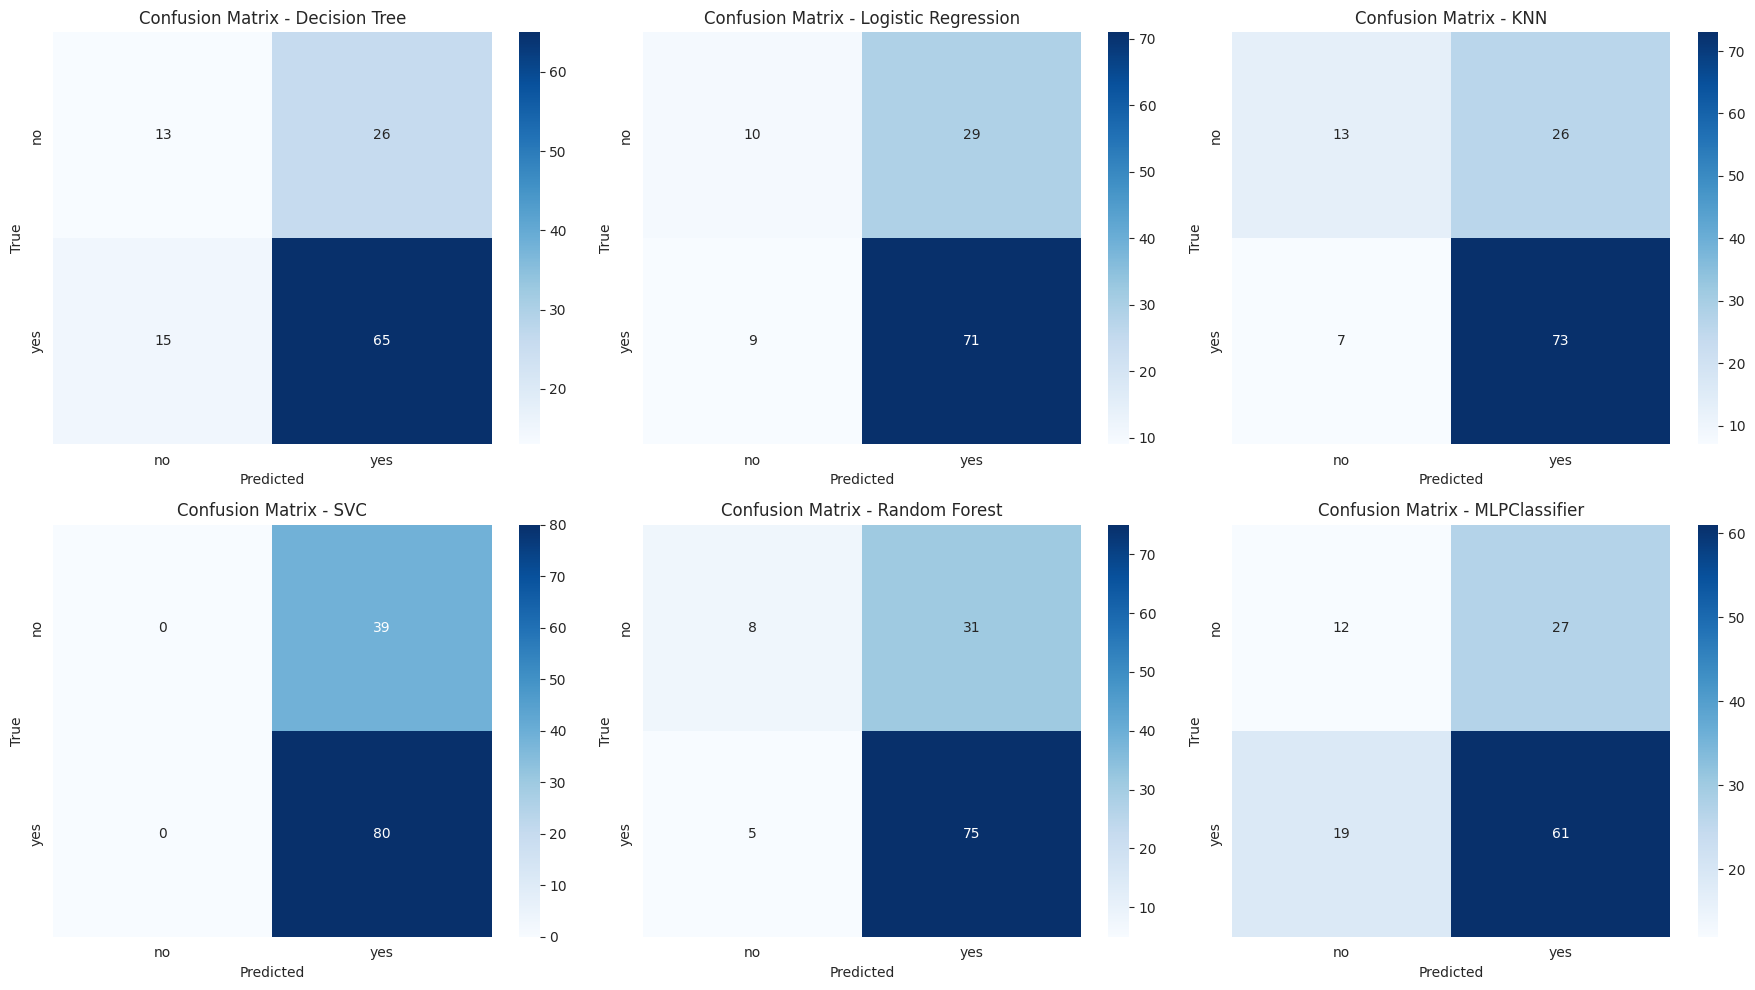

In [38]:
# Display best parameters for each model
print("\nBest Hyperparameters for Each Model:")
for model_name, params in best_params_dict.items():
    print(f"{model_name}: {params}")

# Fit classifiers with best parameters for confusion matrix and ROC curve plotting
dt_clf = DecisionTreeClassifier(criterion=best_params_dict["Decision Tree"]["clf__criterion"], 
                              max_depth=best_params_dict["Decision Tree"]["clf__max_depth"],
                              min_samples_split=best_params_dict["Decision Tree"]["clf__min_samples_split"],
                              random_state=42)
lr_clf = LogisticRegression(C=best_params_dict["Logistic Regression"]["clf__C"],
                           max_iter=best_params_dict["Logistic Regression"]["clf__max_iter"],
                           random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=best_params_dict["KNN"]["clf__n_neighbors"],
                              weights=best_params_dict["KNN"]["clf__weights"])
svc_clf = SVC(C=best_params_dict["SVC"]["clf__C"],
              kernel=best_params_dict["SVC"]["clf__kernel"],
              probability=True,
              random_state=42)
rf_clf = RandomForestClassifier(n_estimators=best_params_dict["Random Forest"]["clf__n_estimators"],
                               max_depth=best_params_dict["Random Forest"]["clf__max_depth"],
                               min_samples_split=best_params_dict["Random Forest"]["clf__min_samples_split"],
                               random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=best_params_dict["MLPClassifier"]["clf__hidden_layer_sizes"],
                       max_iter=best_params_dict["MLPClassifier"]["clf__max_iter"],
                       random_state=42)

classifiers = {
    "Decision Tree": dt_clf,
    "Logistic Regression": lr_clf,
    "KNN": knn_clf,
    "SVC": svc_clf,
    "Random Forest": rf_clf,
    "MLPClassifier": mlp_clf
}

# Train models with balanced data
for clf in classifiers.values():
    clf.fit(X_train, y_train)

# Prepare ROC curves for each model
roc_curves = {}
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.decision_function(X_test)
    roc_curves[name] = (y_test, y_proba)

# Display final results
df_results = pd.DataFrame(final_results).set_index("Model")
print("\nEvaluation Complete. Summary of Results:")
display(df_results)

# Plotting the results
df_plot = df_results.rename(columns=lambda x: x.title().replace("_", "-"))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "Auc"]
df_plot = df_plot[metrics_to_plot]

ax = df_plot.plot(kind="bar", figsize=(12, 6))
ax.set_title("Model Performance Comparison")
ax.set_ylabel("Average Metric Value")
ax.set_xticklabels(df_plot.index, rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Metric", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, (y_true, y_proba) in roc_curves.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=1, label="Chance Level")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", title="Models")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot confusion matrices with labels 'no' and 'yes'
labels = ['no', 'yes']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
model_names = list(classifiers.keys())

for i, name in enumerate(model_names):
    y_pred = classifiers[name].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i],
        xticklabels=labels,
        yticklabels=labels
    )
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
plt.tight_layout()
plt.show()

##### **Comparition before and after tuning**

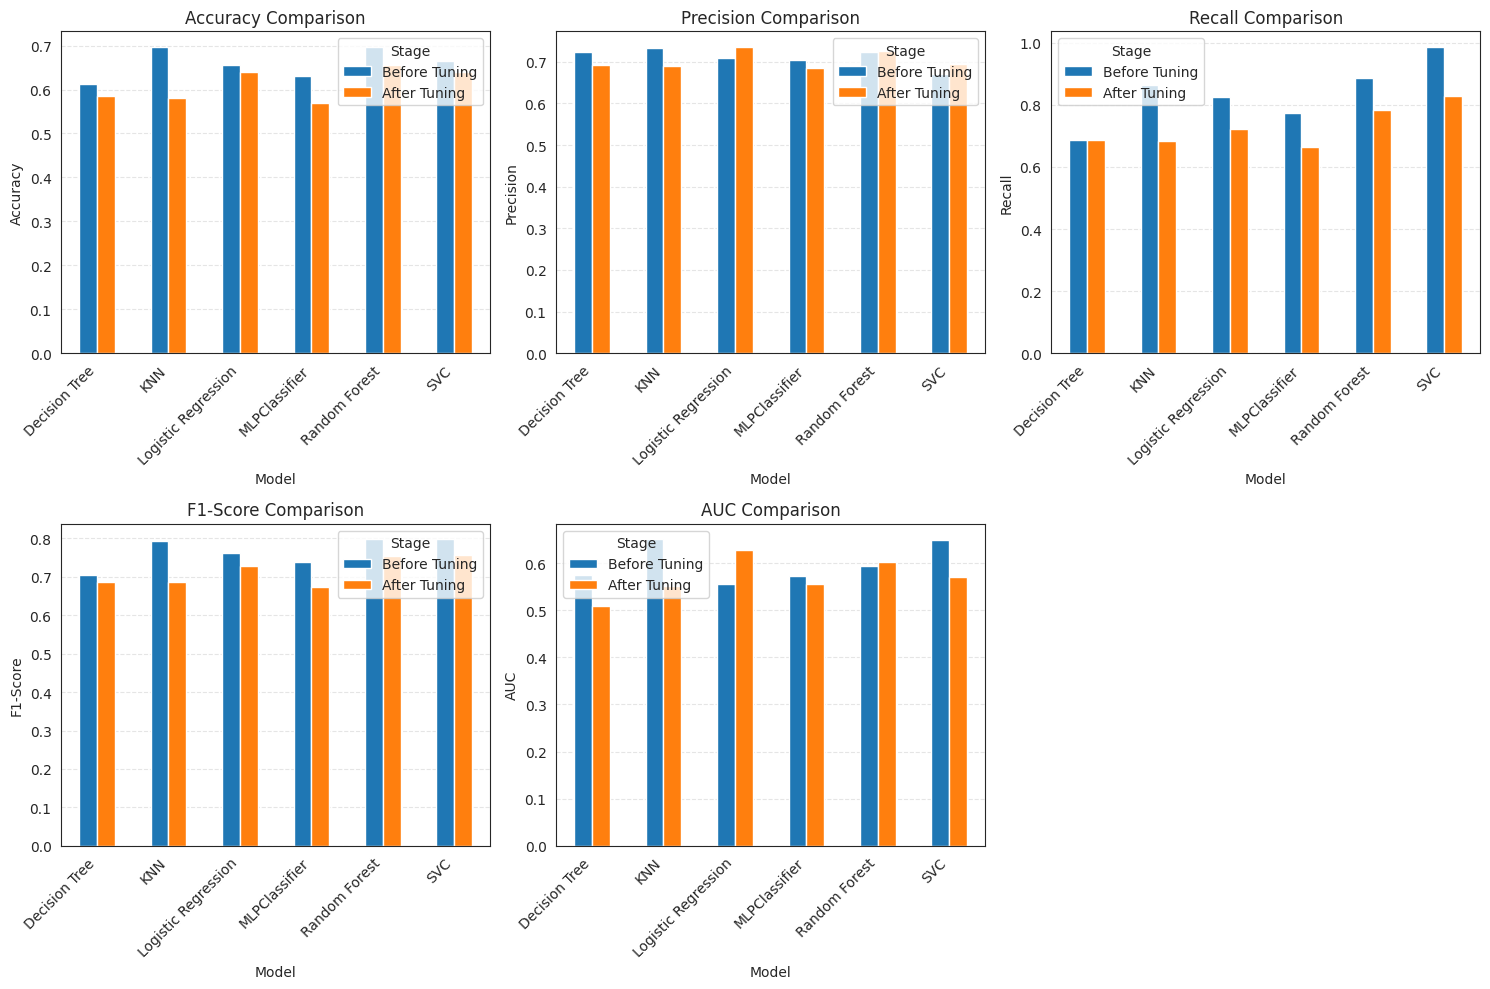


Percentage Improvement After Tuning:


,Accuracy Improvement,Precision Improvement,Recall Improvement,F1-Score Improvement,AUC Improvement
Decision Tree,-4.44%,-4.32%,-0.11%,-2.57%,-11.39%
Logistic Regression,-2.36%,3.73%,-12.61%,-4.66%,13.17%
KNN,-16.69%,-5.89%,-20.82%,-13.59%,-15.19%
SVC,-3.63%,3.83%,-15.93%,-5.29%,-12.06%
Random Forest,-6.10%,0.13%,-11.54%,-5.55%,1.39%
MLPClassifier,-9.71%,-2.86%,-14.31%,-8.92%,-2.99%


In [39]:
# Create a DataFrame to compare results before and after tuning
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN', 'SVC', 'Random Forest', 'MLPClassifier'] * 2,
    'Stage': ['Before Tuning'] * 6 + ['After Tuning'] * 6,
    'Accuracy': [0.613445, 0.655462, 0.697479, 0.663866, 0.697479, 0.630252,
                 0.586218, 0.640000, 0.581090, 0.639744, 0.654936, 0.569038],
    'Precision': [0.723684, 0.709677, 0.734043, 0.669492, 0.724490, 0.704545,
                  0.692386, 0.736167, 0.690824, 0.695155, 0.725406, 0.684417],
    'Recall': [0.687500, 0.825000, 0.862500, 0.987500, 0.887500, 0.775000,
               0.686752, 0.720940, 0.682906, 0.830199, 0.785043, 0.664103],
    'F1-Score': [0.705128, 0.763006, 0.793103, 0.797980, 0.797753, 0.738095,
                 0.687037, 0.727419, 0.685306, 0.755749, 0.753498, 0.672255],
    'AUC': [0.574519, 0.554487, 0.650641, 0.648077, 0.593910, 0.573397,
            0.509078, 0.627529, 0.551824, 0.569910, 0.602148, 0.556279]
})

# Create a figure with subplots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    # Create pivot table for the current metric
    pivot_df = comparison_df.pivot(index='Model', columns='Stage', values=metric)
    
    # Plot grouped bar chart with reordered columns
    pivot_df = pivot_df[['Before Tuning', 'After Tuning']]
    pivot_df.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(pivot_df.index, rotation=45, ha='right')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    axes[i].legend(title='Stage')

# Remove the extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Calculate and display improvement percentages
improvement_df = pd.DataFrame()

for metric in metrics:
    before = comparison_df[comparison_df['Stage'] == 'Before Tuning'][metric].values
    after = comparison_df[comparison_df['Stage'] == 'After Tuning'][metric].values
    improvement = ((after - before) / before) * 100
    
    improvement_df[f'{metric} Improvement'] = improvement

improvement_df.index = comparison_df['Model'].unique()
print("\nPercentage Improvement After Tuning:")
display(improvement_df.round(2).style.format("{:.2f}%"))


**Results Analysis: Hyperparameter Tuning**

All experiments used **stratified 10-fold cross-validation** with **SMOTE** integrated into the pipeline. The optimization metric was **F1-score**, aiming for the best balance between precision and recall.

---

**Table 1. Results Before Tuning**

| Model              | Accuracy | Precision | Recall  | F1-Score | AUC    |
|--------------------|:--------:|:---------:|:-------:|:--------:|:------:|
| Decision Tree       | 0.6134   | 0.7237    | 0.6875  | 0.7051   | 0.5745 |
| Logistic Regression | 0.6555   | 0.7097    | 0.8250  | 0.7630   | 0.5545 |
| KNN                 | 0.6975   | 0.7340    | 0.8625  | 0.7931   | 0.6506 |
| SVC                 | 0.6639   | 0.6695    | 0.9875  | 0.7980   | 0.6480 |
| Random Forest       | 0.6975   | 0.7245    | 0.8875  | 0.7978   | 0.5939 |
| MLPClassifier       | 0.6303   | 0.7045    | 0.7750  | 0.7381   | 0.5734 |

---

**Table 2. Results After Tuning**

| Model              | Accuracy | Precision | Recall  | F1-Score | AUC    |
|--------------------|:--------:|:---------:|:-------:|:--------:|:------:|
| Decision Tree       | 0.5862   | 0.6924    | 0.6868  | 0.6870   | 0.5091 |
| Logistic Regression | 0.6400   | 0.7362    | 0.7209  | 0.7274   | 0.6275 |
| KNN                 | 0.5811   | 0.6908    | 0.6829  | 0.6853   | 0.5518 |
| SVC                 | 0.6397   | 0.6952    | 0.8302  | 0.7557   | 0.5699 |
| Random Forest       | 0.6549   | 0.7254    | 0.7850  | 0.7535   | 0.6021 |
| MLPClassifier       | 0.5690   | 0.6844    | 0.6641  | 0.6723   | 0.5563 |

---

**Table 3. Percentage Change After Tuning**

| Model              | Accuracy ↑ | Precision ↑ | Recall ↑ | F1-Score ↑ | AUC ↑    |
|--------------------|:----------:|:-----------:|:--------:|:----------:|:--------:|
| **Decision Tree**       | −4.44 %    | −4.32 %     | −0.11 %  | −2.57 %    | −11.39 % |
| **Logistic Regression** | −2.36 %    | **+3.73 %** | −12.61 % | −4.66 %    | **+13.17 %** |
| **KNN**                 | −16.69 %   | −5.89 %     | −20.82 % | −13.59 %   | −15.19 % |
| **SVC**                 | −3.63 %    | **+3.83 %** | −15.93 % | −5.29 %    | − 7.07 % |
| **Random Forest**       | −6.10 %    | +0.13 %     | −11.54 % | −5.55 %    | +1.39 %  |
| **MLPClassifier**       | −9.71 %    | −2.86 %     | −14.31 % | −8.91 %    | −2.99 %  |

---

**Critical Analysis of Results**

**Overall drop in performance after tuning**

- **All models** showed a **decrease in F1-score and Recall**, with the exception of **slight improvements in Precision** and **AUC** in some cases.
- Instead of optimizing, tuning have **reduced the generalization ability of the models** — possible due to:
  - Inadequate search space
  - Overfitting during `GridSearchCV`
  - Overly conservative configurations

**Most affected models:**
- **KNN** was the most affected: it lost **−16.69% in Accuracy**, **−20.82% in Recall**, and **−13.59% in F1-score**.
- **MLPClassifier** experienced significant drops across all metrics, suggesting poor convergence or underfitting.
- **Decision Tree** lost over 11% in AUC, in addition to declines in all key metrics.

**Isolated improvements:**
- **Logistic Regression** improved AUC by +13.17% and Precision by +3.73%, despite a Recall drop (−12.61%).
- **SVC** also showed a small improvement in Precision (+3.83%) but a considerable drop in Recall.


## 5. Feature importante

**Feature importance for the original models**

            Feature  Importance
3          failures    0.114731
16         absences    0.096409
12            goout    0.074539
11         freetime    0.063858
2         studytime    0.060079
34           avgEdu    0.058291
0               age    0.046475
15           health    0.044766
35  student_support    0.043530
8          internet    0.038525


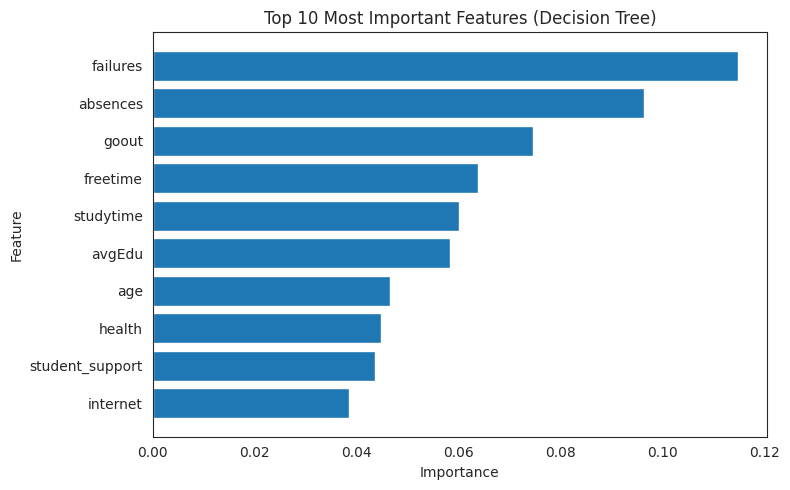

In [40]:
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42, max_iter=1000)
knn_clf = KNeighborsClassifier()
svc_clf = SVC(probability=True, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
mlp_clf = MLPClassifier(random_state=42, max_iter=2000)

# Fit the Decision Tree model first
dt_clf.fit(X, y)

# Feature importance using optimized Decision Tree
importances = dt_clf.feature_importances_
feature_names = X.columns

df_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
print(df_importances.head(10))

# Plot of the most important features
plt.figure(figsize=(8, 5))
plt.barh(df_importances["Feature"][:10][::-1], df_importances["Importance"][:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features (Decision Tree)")
plt.tight_layout()
plt.show()

            Feature  Importance
16         absences    0.087032
3          failures    0.075551
12            goout    0.065197
34           avgEdu    0.064633
0               age    0.053426
15           health    0.047940
11         freetime    0.045548
35  student_support    0.042740
14             Walc    0.042586
2         studytime    0.037219


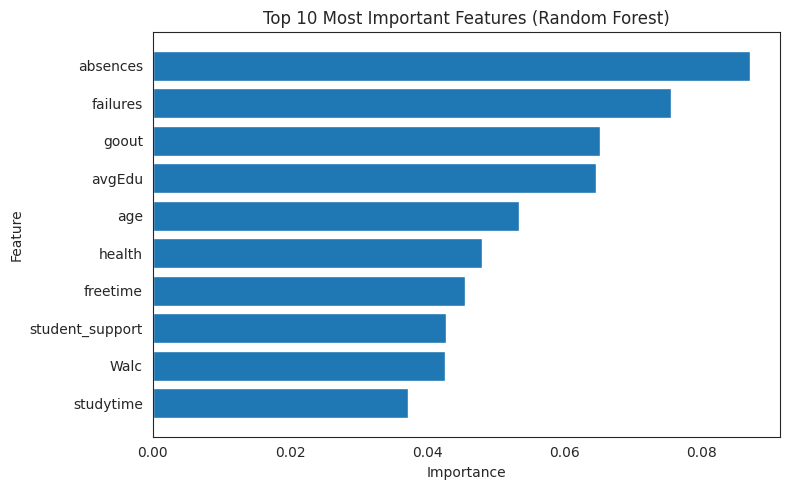

In [41]:
# Fit the Decision Tree model first
rf_clf.fit(X, y)

# Feature importance using Random Forest
importances = rf_clf.feature_importances_
feature_names = X.columns

df_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
print(df_importances.head(10))

# Plot of the most important features
plt.figure(figsize=(8, 5))
plt.barh(df_importances["Feature"][:10][::-1], df_importances["Importance"][:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()

              Feature  Coefficient  Absolute_Coefficient
3            failures    -0.848302              0.848302
20       Mjob_teacher    -0.680008              0.680008
35    student_support    -0.675910              0.675910
12              goout    -0.512292              0.512292
7              higher     0.478302              0.478302
26       reason_other     0.440623              0.440623
17        Mjob_health     0.418066              0.418066
24       Fjob_teacher     0.417866              0.417866
30              sex_M     0.401561              0.401561
27  reason_reputation     0.395832              0.395832


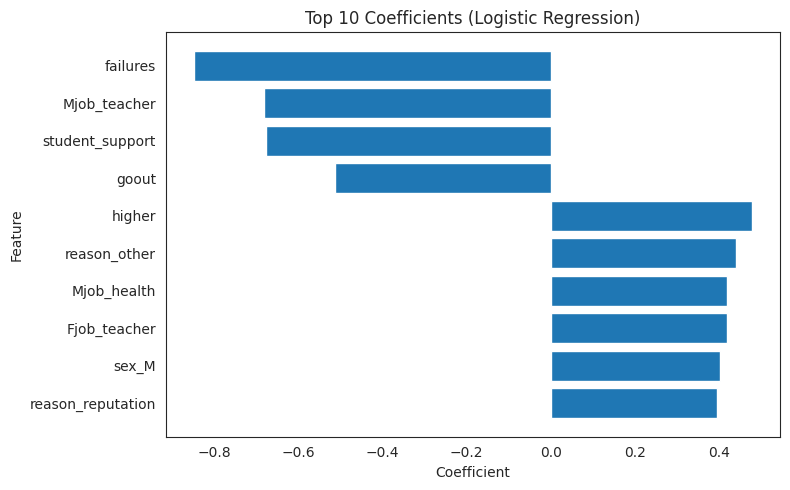

In [42]:
# Coefficients of Logistic Regression
if not hasattr(lr_clf, 'coef_'):
    lr_clf.fit(X, y)

coefs = lr_clf.coef_[0]
features = X.columns

df_coef = pd.DataFrame(
    {"Feature": features, "Coefficient": coefs, "Absolute_Coefficient": np.abs(coefs)}
).sort_values(by="Absolute_Coefficient", ascending=False)

print(df_coef.head(10))

# Plot of the most relevant coefficients
plt.figure(figsize=(8, 5))
plt.barh(df_coef["Feature"][:10][::-1], df_coef["Coefficient"][:10][::-1])
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Top 10 Coefficients (Logistic Regression)")
plt.tight_layout()
plt.show()

### **Feature Importance Results**

##### **Decision Tree**

**Top Predictors:**
1. **failures** (0.1147)  
2. **absences** (0.0964)  
3. **goout** (0.0745)  
4. **freetime** (0.0639)  
5. **studytime** (0.0601)  
6. **avgEdu** (average parental education, 0.0583)  
7. **age** (0.0465)  
8. **health** (0.0448)  
9. **student_support** (0.0435)  
10. **internet** (0.0385)  

- Past failures and absences are the most influential predictors.
- Social and family-related factors (e.g., free time, parental education, student support) are also relevant.
- Personal characteristics like age, health, and internet access contribute to predictions.

---

##### **Random Forest**

**Top Predictors:**
1. **absences** (0.0870)  
2. **failures** (0.0756)  
3. **goout** (0.0652)  
4. **avgEdu** (0.0646)  
5. **age** (0.0534)  
6. **health** (0.0479)  
7. **freetime** (0.0455)  
8. **student_support** (0.0427)  
9. **Walc** (weekend alcohol consumption, 0.0426)  
10. **studytime** (0.0372)  

- Feature importance is more evenly distributed across academic, social, and family-related variables.
- Absences and past failures remain the leading factors.
- Additional relevant predictors include weekend alcohol use, student support, and parental background.

---

##### **Logistic Regression**

**Top Coefficients (absolute values):**
1. **failures** (−0.848)  
2. **Mjob_teacher** (−0.680)  
3. **student_support** (−0.676)  
4. **goout** (−0.512)  
5. **higher** (+0.478)  
6. **reason_other** (+0.441)  
7. **Mjob_health** (+0.418)  
8. **Fjob_teacher** (+0.418)  
9. **sex_M** (+0.402)  
10. **reason_reputation** (+0.396)  

- Increased risk of failure is associated with: more past failures, having a mother who is a teacher, less student support, and frequent social outings.
- Lower risk of failure is associated with: intention to pursue higher education, parents working in education/health, being male, and choosing the school for its reputation.

---

##### **Cross-Model Comparison**

- **Consensus:** All models consistently identify **failures** as the most critical predictor.
- **Frequent Factors:** Features like **absences**, **goout** and **student_support** appear among the top predictors.



# 6. Model Demostration

In [58]:
# Select a random student from the dataset
random_student_index = random.randint(0, len(X) - 1)
random_student = X.iloc[random_student_index:random_student_index + 1]
actual_result = y.iloc[random_student_index]

# Create a dictionary to store the prediction results
prediction_results = []

# Apply each model to predict whether the student passed or not
for model_name, model in classifiers.items():
    prediction = model.predict(random_student)[0]
    probability = model.predict_proba(random_student)[0][1] if hasattr(model, "predict_proba") else None
    prediction_results.append({
        "Model": model_name,
        "Prediction": "Passed" if prediction == 1 else "Failed",
        "Probability": f"{probability:.2f}" if probability is not None else "N/A"
    })

# Add the actual result of the student
actual_result_text = "Passed" if actual_result == 1 else "Failed"
print(f"Random Student Index: {random_student_index}")
print(f"Actual Result: {actual_result_text}")

# Display the results in table format
results_df = pd.DataFrame(prediction_results)
print("\nPrediction Results:")
display(results_df)


Random Student Index: 216
Actual Result: Failed

Prediction Results:


,Model,Prediction,Probability
0,Decision Tree,Failed,0.00
1,Logistic Regression,Failed,0.38
2,KNN,Passed,0.67
3,SVC,Passed,0.42
4,Random Forest,Failed,0.32
5,MLPClassifier,Failed,0.00


# 7. Comparative Analysis with Original Article

#### **SETUP C Methodology**

SETUP C represents the most challenging scenario in the article, predicting student performance without using previous grades:
- Excludes first period grade (G1)
- Excludes second period grade (G2)
- Uses only demographic, social, and school-related variables

#### **Performance Comparison**

##### Binary Classification (Pass/Fail)

| Model | Current Analysis (Accuracy) | Article SETUP C (PCC) | Difference |
|--------|----------------------|---------------------|-----------|
| Decision Tree | 61.3% | 65.3% | -3.96% |
| Random Forest | 69.7% | 70.5% | -0.75% |
| Neural Network | 63.0% | 66.3% | -3.27% |
| SVM | 66.3% | 70.6% | -4.21% |
| Logistic Regression | 65.5% | N/A | N/A |
| KNN | 69.7% | N/A | N/A |

- Overall results are better in the article, nonetheless, both follow similar patterns
 
#### **Feature Importance Comparison**
 
##### Random Forest
 
| Current Analysis                       | Article SETUP C                             |
|-------------------------------------|---------------------------------------------|
| 1. absences (8.70%)                | 1. failures (19.7% Mat-Reg / 16.8% Por-Bin) |
| 2. failures (7.56%)                | 2. absences (18.9% Mat-Reg)                 |
| 3. goout (6.52%)                   | 3. schoolsup (8.3% Mat-Reg / 6.9% Por-Reg)  |
| 4. avgEdu (6.46%)                  | 4. higher (5.4% Mat-Reg / 13.1% Por-Bin)    |
| 5. age (5.34%)                     | 5. Mjob (4.2% Mat-Reg)                      |
 
 
- Both identify "failures" and "absences" as the most important features
- These two variables occupy the top positions in both result sets, though in reverse order
 
#### Methodological Differences
 
| Aspect | Current Analysis | Article SETUP C |
|--------|------|----------------|
| Algorithms | DT, RF, Logistic Regression, KNN, SVC, MLPClassifier | DT, RF, NN, SVM, Naive Predictor |
| Validation | 10-fold cross-validation with 20 repetitions |10-fold cross-validation with 20 repetitions|
| Metrics | Accuracy, Precision, Recall, F1-Score, AUC | PCC (classification), RMSE (regression) |
| Tasks | Binary classification | Binary classification, 5-level classification, regression |

#### Final conclusions
 
1. **Consistent Feature Importance**: Both analyses identify previous failures and absences as the strongest predictors of academic performance.
 
2. **Similar Model Performance**: Tree-based algorithms (Random Forest) and SVM achieve the best performance in both analyses, with accuracy/PCC around 70%.
 
3. **Additional Insights from Current Analysis**: 
   - KNN performs competitively (69.75% accuracy)
   - Additional metrics (Precision, Recall, F1-Score) provide more comprehensive evaluation
 
4. **SETUP C Limitations**: Both analyses confirm that predicting performance without previous grades is challenging, with maximum accuracy around 70%.

# References

Cortez, P., & Silva, A. M. G. (2008). Using Data Mining to Predict Secondary School Student Performance. University of Minho.  
https://repositorium.sdum.uminho.pt/handle/1822/8024  

Russell, S. J., & Norvig, P. (2020). *Artificial Intelligence: A Modern Approach* (4th ed.). Pearson. ISBN: 9780134610993  

Hurbans, R. (2020). *Grokking Artificial Intelligence Algorithms: Understand and apply the core algorithms of deep learning and artificial intelligence*. Manning Publications. ISBN: 9781617295263  

Gallatin, K., & Albon, C. (2023). *Machine Learning with Python Cookbook* (2nd ed.). O’Reilly Media. ISBN: 9781098135720  

pandas development team. (2025). *pandas* (latest version) [Software]. https://pandas.pydata.org/  

scikit-learn developers. (2025). *Scikit-learn* (latest version) [Software]. https://scikit-learn.org/  

Hunter, J. D., et al. (2025). *Matplotlib* (latest version) [Software]. https://matplotlib.org/  

Waskom, M., et al. (2025). *Seaborn* (latest version) [Software]. https://seaborn.pydata.org/  


